<a href="https://colab.research.google.com/github/rupaidutta66/Object_Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision
!pip install opencv-python
!pip install matplotlib


In [ ]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

import torch
from torchvision import models, transforms
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator



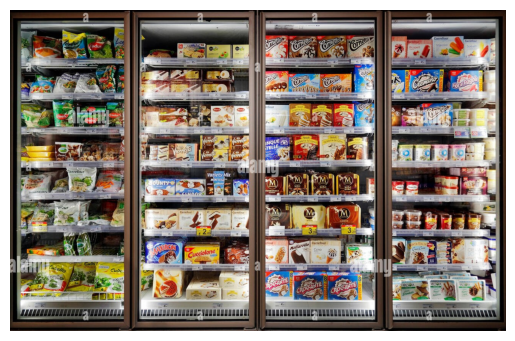

Number of items detected: 98


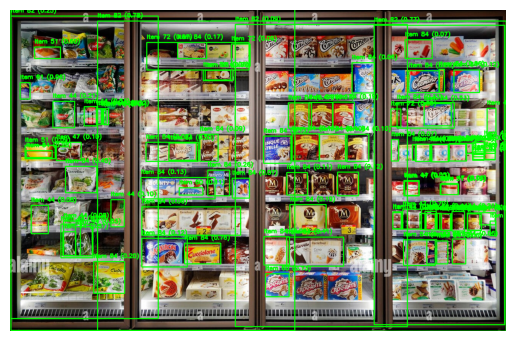

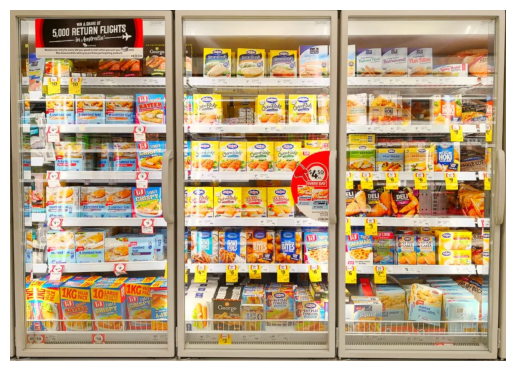

Number of items detected: 35


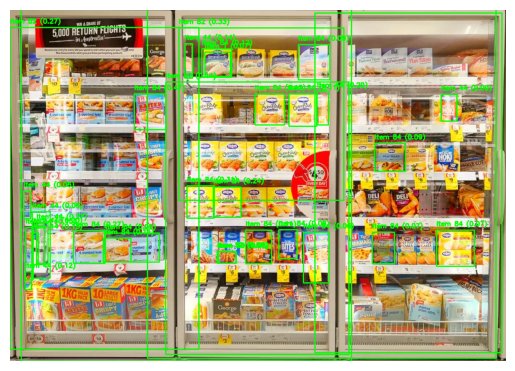

In [ ]:

def perform_object_detection(image_path):

    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    # Load the pre-trained Faster R-CNN model
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Define a transformation to preprocess the image
    transform = transforms.Compose([transforms.ToTensor()])


    input_image = transform(image).unsqueeze(0)


    with torch.no_grad():
        prediction = model(input_image)

    labels = prediction[0]['labels']

    # Count the number of items
    num_items = len(labels)

    # Print the number of items
    print(f'Number of items detected: {num_items}')

    # Draw bounding boxes around detected objects
    image_with_boxes = image.copy()

    for i in range(num_items):
        label = int(labels[i])
        score = float(prediction[0]['scores'][i])
        box = prediction[0]['boxes'][i].cpu().numpy().astype(int)


        color = (0, 255, 0)  # Green
        cv2.rectangle(image_with_boxes, (box[0], box[1]), (box[2], box[3]), color, 2)

        # Add label and confidence score
        label_text = f'Item {label} ({score:.2f})'
        cv2.putText(image_with_boxes, label_text, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


    image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
    plt.imshow(image_with_boxes_rgb)
    plt.axis('off')
    plt.show()

image1_path = '/content/freezer_image (1).jpg'
image2_path = '/content/freezer_image (2).jpg'

perform_object_detection(image1_path)
perform_object_detection(image2_path)
